# HW0 Instructions

Welcome to the assignment! In this task, you will complete **6 functions** to test your prerequisite knowledge for this course. Each function is worth **3 points**. Please carefully follow the guidelines below to ensure successful submission and autograding.

## Guidelines
- **AI Assistance**: You are allowed to use AI tools to assist you with this assignment. However, you must explicitly acknowledge and summarize your AI usage in the **"AI Usage Summary"** section at the end of the assignment.
- **Autograding**: The assignment will be autograded upon submission to Gradescope. To ensure the autograding process works correctly:
  - Do not delete or rename any pre-defined functions and variables.
  - Replace the `...` placeholders with your implementations.
  - Ensure all inputs and outputs strictly adhere to the formats specified in the problem descriptions.
  - You are allowed to add additional print statements or visualizations to help with debugging. However, ensure these do not interfere with the functionality of the main function or required outputs.
- **Submission**: Submit the completed `.ipynb` file to Gradescope.

In [3]:
import numpy as np
from imageio.v2 import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

%matplotlib inline
rng_seed = 90

# 1. Basic Image Manipulation


### Download and Display Two Images

Here we download a pair of images and convert them to `numpy` arrays. The images are `uint8` by default, but we convert them to floating point numbers between [0,1] since it helps avoid a variety of issues.


(-0.5, 665.5, 844.5, -0.5)

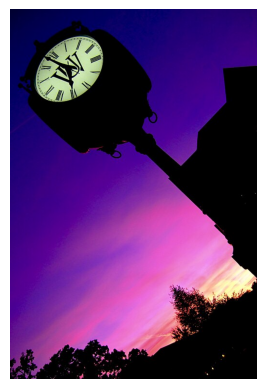

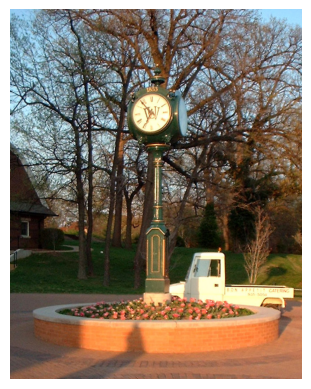

In [4]:
im1 = imread("https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/WashU_Clocktower.jpg/512px-WashU_Clocktower.jpg")
im2 = imread("https://upload.wikimedia.org/wikipedia/commons/4/45/Clocktower_on_s40.jpg")

# convert to floating point and reduce range to [0,1]
im1 = im1.astype(np.float32) / 255
im2 = im2.astype(np.float32) / 255

# display images
plt.figure()
plt.imshow(im1); plt.axis('off')
plt.figure()
plt.imshow(im2); plt.axis('off')

### Average the Images

**Task**: Create a function `average_images(im1, im2)` that combines the two images by averaging them. Within the function, use `im_avg = (im1 + im2)/2` to average the images. Ensure the function works with images of arbitrary size.

**Input:**
- `im1` (numpy.ndarray): The first input image.
- `im2` (numpy.ndarray): The second input image.
  
**Output:**
- `im_avg` (numpy.ndarray): The averaged image.

**Additional Hint:**
- The images aren't the same size, so you'll either need to crop them (using `numpy` slicing) or resize them (potentially using this `scipy` function e.g. `resize(im1, (140, 54))`)

<img src="https://mvrl.cse.wustl.edu/cse559/hw_precheck/Cropped_average.jpg" alt="Cropped and averaged image" title="Cropped and averaged image" width="300"> <img src="https://mvrl.cse.wustl.edu/cse559/hw_precheck/Resized_average.jpg" alt="Resized and averaged image" title="Resized and averaged image" width="300">


_Points:_ 3

(-0.5, 511.5, 767.5, -0.5)

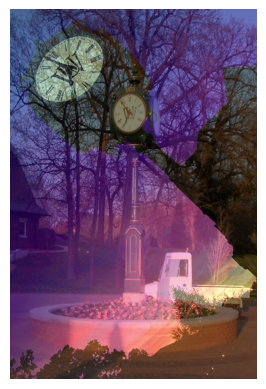

In [18]:
#YOUR CODE GOES HERE
def average_images(im1, im2):
    """
    Parameters:
        im1: image 1
        im2: image 2
    Returns:
        averaged_image
    """
    # resize im2 to the shape of im1
    im2 = resize(im2, im1.shape)

    # average the two images
    return (im1 + im2) / 2
    
averaged_image = average_images(im1, im2)
plt.figure()
plt.imshow(averaged_image); plt.axis('off') # you should see the averaged image similar to the one above

# 2. Basic Matrix Multiplication
**Task:** Write a function `matrix_swap(M, N, swap_type, idx1, idx2)` that swaps rows or columns of a matrix using matrix multiplication.


**Input:**
- `M` (int): Number of rows in the matrix.
- `N` (int): Number of columns in the matrix.
- `swap_type` (str): Either `"row"` or `"column"`, indicating the type of swap.
- `idx1` (int): Index of the first row/column to swap (0-based).
- `idx2` (int): Index of the second row/column to swap (0-based).

**Output:**
- A tuple `(P, Q)` of two NumPy matrices:
  - `P`: A permutation matrix for swapping rows (if `swap_type="row"`) or identity matrix otherwise.
  - `Q`: A permutation matrix for swapping columns (if `swap_type="column"`) or identity matrix otherwise.

**Example:**  
Given the following input:
```python
M, N = 4, 5
swap_type = "row"
idx1, idx2 = 1, 3
```
Your function should return:
```python
P = [[1, 0, 0, 0],
     [0, 0, 0, 1],
     [0, 0, 1, 0],
     [0, 1, 0, 0]]

Q = [[1, 0, 0, 0, 0],
     [0, 1, 0, 0, 0],
     [0, 0, 1, 0, 0],
     [0, 0, 0, 1, 0],
     [0, 0, 0, 0, 1]]
```

**Additional Hint:**  
To create permutation matrices:
- For `P` (row swap), start with an identity matrix of size `M x M` and exchange rows `idx1` and `idx2`.
- For `Q` (column swap), start with an identity matrix of size `N x N` and exchange rows `idx1` and `idx2` (which effectively swaps the columns of the matrix when applied).


_Points:_ 3

In [19]:
#YOUR CODE GOES HERE
def matrix_swap(M, N, swap_type, idx1, idx2):
    """
    Parameters:
        M (int): Number of rows in the matrix.
        N (int): Number of columns in the matrix.
        swap_type (str): Either "row" or "column".
        idx1 (int): Index of the first row/column to swap.
        idx2 (int): Index of the second row/column to swap.

    Returns:
        tuple: A tuple of two matrices (P, Q) as numpy arrays.
    """
    # create identity matrix of size M, and N
    P = np.eye(M)
    Q = np.eye(N)
    
    if swap_type == "row":
        # swap the rows
        P[[idx1, idx2]] = P[[idx2, idx1]]

    if swap_type == "column":
        # swap the columns
        Q[:, [idx1, idx2]] = Q[:, [idx2, idx1]]

    return P, Q
    
P, Q = matrix_swap(3, 4, "row", 0, 2)
print(P) # should be [[0. 0. 1.], [0. 1. 0.], [1. 0. 0.]]
print(Q) # should be [[1. 0. 0. 0.], [0. 1. 0. 0.], [0. 0. 1. 0.], [0. 0. 0. 1.]]

P, Q = matrix_swap(3, 4, "column", 1, 3)
print(P) # should be [[1. 0. 0.], [0, 1, 0], [0, 0, 1]]
print(Q) # should be [[1. 0. 0. 0.], [0. 0. 0. 1.], [0. 0. 1. 0.], [0. 1. 0. 0.]]



[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


## 3. Solving a System of Linear Equations

**Task**: Write a function `systems_solver(A, B)` that solves a given system of linear equations using matrix inversion.


**Input:**
- `A` (numpy.ndarray): A 2x2 coefficient matrix representing the linear equations' coefficients.
- `B` (numpy.ndarray): A 1-dimensional array (vector) representing the constant terms of the linear equations.

**Output:**
- A tuple `(x, y)` containing the solution values for the system of equations.

**Example:**  
Given the following input:
```python
A = np.array([[2, 3], [4, 5]])
B = np.array([13, 23])
```
Your function should return:
```python
(2.0, 3.0)
```


_Points:_ 3

In [20]:
#YOUR CODE GOES HERE
def systems_solver(A, B):
    """
    Parameters:
        A (numpy.ndarray): A 2x2 coefficient matrix representing the linear equations' coefficients.
        B (numpy.ndarray): A 1-dimensional array (vector) representing the constant terms of the linear equations.
    Returns:
        x (float)
        y (float)
    """
    # compute the inverse of A
    A_inv = np.linalg.inv(A)

    # compute the solution
    x, y = A_inv @ B

    return x, y
    
A = np.array([[2, 3],[4, 5]])
B = np.array([13, 23])
x, y = systems_solver(A, B)
print(x, y) # should be close to 2.0, 3.0

A = np.array([[1, 2],[3, 4]])
B = np.array([5, 11])
x, y = systems_solver(A, B)
print(x, y) # should be close to 1.0, 2.0

2.0 3.0
1.0 2.0


## 4. Eigenvalue Decomposition

**Task**: Create a function `eigenvalue_decomposition(data)` that performs eigenvalue decomposition on a simple covariance matrix to identify its principal directions.

**Input:**
- `data` (numpy.ndarray): A 2D array where each row is a sample, and each column is a feature.

**Output:**
- `eigenvalues` (numpy.ndarray): The eigenvalues sorted in descending order.
- `eigenvectors` (numpy.ndarray): The eigenvectors corresponding to the eigenvalues.

**Example:**
```python
data = np.array([[2.5, 0.5, 2.2],
                 [1.9, 0.3, 2.7],
                 [3.1, 0.7, 1.8],
                 [2.3, 0.4, 2.5],
                 [2.0, 0.6, 2.3]])

eigenvalues, eigenvectors = eigenvalue_decomposition(data)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)
```

**Additional Hint:**  
- input data should be converted into a covariance matrix within the function

_Points:_ 3

In [21]:
#YOUR CODE GOES HERE
def eigenvalue_decomposition(data):
    """
    Parameters:
        data (np.ndarray): A 2D array where each row is a sample, and each column is a feature.
    Returns:
        eigenvalues (sorted in descending order)
        eigenvectors 
    """
    # mean center the data
    data = data - np.mean(data, axis=0)

    # compute the covariance matrix
    cov = np.cov(data.T)

    # compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov)

    return eigenvalues, eigenvectors
    
data = np.array([[2.5, 0.5, 2.2],
                 [1.9, 0.3, 2.7],
                 [3.1, 0.7, 1.8],
                 [2.3, 0.4, 2.5],
                 [2.0, 0.6, 2.3]])

eigenvalues, eigenvectors = eigenvalue_decomposition(data)
print("Eigenvalues:", eigenvalues) # should be around Eigenvalues: [0.34323052 0.02427055 0.00049893]
print("Eigenvectors:\n", eigenvectors) 
# should be around Eigenvectors:
# [[-0.80095202 -0.56656074  0.19360987]
# [-0.21964936  0.578872    0.78527789]
# [ 0.55698296 -0.58644363  0.5880934 ]]


Eigenvalues: [0.34323052 0.02427055 0.00049893]
Eigenvectors:
 [[ 0.80095202  0.56656074  0.19360987]
 [ 0.21964936 -0.578872    0.78527789]
 [-0.55698296  0.58644363  0.5880934 ]]


## 5. Linear Translation Using NumPy

**Task**: Write a function `translation(shape, tx=0, ty=0)` that moves (translates) a set of 2D points by specified amounts along the x and y axes.

<img src="https://mvrl.cse.wustl.edu/cse559/hw_precheck/Translated_triangle.jpg" alt="Plot of a translated pair of trianges" title="Translated triangle" width="500" />

**Input:**
- `shape` (np.ndarray): A 2D NumPy array with shape `(n, 2)`, where each row represents a point `(x, y)`.
- `tx` (float): The amount to move the points along the x-axis.
- `ty` (float): The amount to move the points along the y-axis.

**Output:**
- A 2D NumPy array of the same shape as `shape`, containing the translated points.

**Example:**
Given the following input:
```python
shape = np.array([[0, 0], [1, 1], [2, 2]])
tx, ty = 3, -2
```
Your function should return:
```python
array([[ 3, -2], [ 4, -1], [ 5,  0]])
```

**Additional Hint:**
To simplify the calculations, you can use **homogeneous coordinates**. This involves appending a column of ones to your points and using matrix multiplication to apply the translation. Here's the basic idea:
1. Append a column of ones to your points (making them 3D).
2. Use a `3x3` translation matrix:
   ```
   [[1, 0, tx],
    [0, 1, ty],
    [0, 0,  1]]
   ```
3. Multiply the points by this matrix to get the translated points.

_Points:_ 3

In [22]:
#YOUR CODE GOES HERE
def translation(shape, tx=0, ty=0):
    """
    Parameters:
        shape (np.ndarray): A 2D array of shape (n, 2), where each row is a 2D point (x, y).
        tx (float): Translation along the x-axis.
        ty (float): Translation along the y-axis.

    Returns:
        np.ndarray: A 2D array of shape (n, 2) containing the translated points.
    """
    # create a 3x3 identity matrix
    T = np.eye(3)

    # replace the last column with the translation values
    T[:2, 2] = [tx, ty]

    # Convert shape to homogeneous coordinates with appended ones column
    shape_homogeneous = np.hstack((shape, np.ones((shape.shape[0], 1))))  

    # matrix multiply shape with translation matrix
    translated_homogeneous = shape_homogeneous @ T.T

    # return translated points without scaling column
    return translated_homogeneous[:, :2]
    
shape = np.array([[0, 0], [1, 1], [2, 2]])  # Example input
tx, ty = 3, -2  # Example translation
translated_shape = translation(shape, tx, ty)
print(translated_shape)  # Expected output: [[ 3, -2], [ 4, -1], [ 5,  0]]

shape = np.array([[1, 1], [2, 2], [3, 3]])  # Example input2
tx, ty = -1, 2  # Example translation2
translated_shape = translation(shape, tx, ty)
print(translated_shape)  # Expected output: [[ 0, 3], [ 1, 4], [ 2, 5]]

[[ 3. -2.]
 [ 4. -1.]
 [ 5.  0.]]
[[0. 3.]
 [1. 4.]
 [2. 5.]]


## 6. 2D Rotation

**Task**: Create a function `rotation(shape, angle_rad)` that applies a 2D rotation transformation to a set of points relative to the origin [0,0]

**Input:**
- `shape` (np.ndarray): A 2D NumPy array with shape `(n, 2)`, where each row represents a point `(x, y)`.
- `angle_rad` (float): The angle of rotation in radians.

**Output:**
- A 2D NumPy array of the same shape as `shape`, containing the rotated points.

**Example:**
Given the following input:
```python
shape = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
angle_rad = np.pi / 4
```
Your function should return:
```python
array([[ 0.        ,  0.        ],
       [ 0.70710678, -0.70710678],
       [ 1.41421356,  0.        ],
       [ 0.70710678,  0.70710678]])
```

<img src="https://mvrl.cse.wustl.edu/cse559/hw_precheck/Rotated_square.jpg" alt="Rotated square" title="Rotated square" width="500">

_Points:_ 3

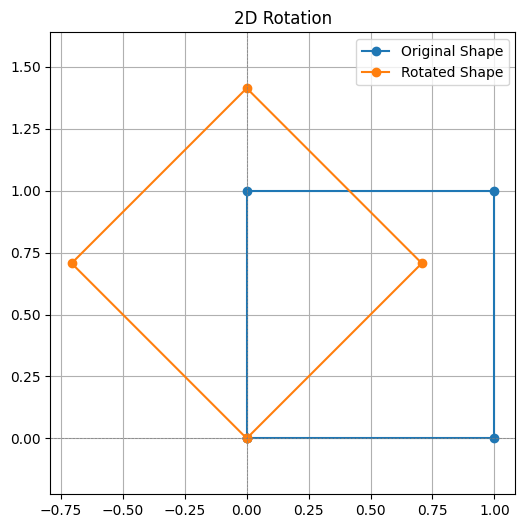

In [25]:
# To help you verify your implementation, visualize the original and rotated shapes.
def visualize_rotation(original_shape, rotated_shape):
    plt.figure(figsize=(6, 6))

    # Plot original shape
    plt.plot(*original_shape.T, marker='o', label='Original Shape')

    # Plot rotated shape
    plt.plot(*rotated_shape.T, marker='o', label='Rotated Shape')

    # Styling
    plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.title('2D Rotation')
    plt.show()
    

#YOUR CODE GOES HERE
def rotation(shape, angle_rad):
    """
    Parameters:
        shape (np.ndarray): A 2D array of shape (n, 2), where each row is a 2D point (x, y).
        angle_rad (float): The angle of rotation in radians.

    Returns:
        np.ndarray: A 2D array of shape (n, 2) containing the rotated points.
    """
    # calculate the rotation matrix
    R = np.array([[np.cos(angle_rad), -np.sin(angle_rad)], [np.sin(angle_rad), np.cos(angle_rad)]])

    # apply rotation to each point
    return shape @ R.T

shape = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0,  0]])  # Example input
angle_rad = np.pi / 4  
rotated_shape = rotation(shape, angle_rad)

visualize_rotation(shape, rotated_shape) # should display the original and rotated shapes same as the image above

# AI Usage Summary

[as per course policy, we allow the use of AI assistants as part of completing homework assignments, however such usage must be acknowledged. If it is detected and not acknowledged, it will be considered a violation of academic integrity. As such, please summarize what AI tools you used to complete this assignment, including for understanding the concepts and generating source code. If you used code generation, please explain the extent to which you had to modify the solution for it to function correctly.]

I used github copilot to fill in the code after self-generating the comments for a few problems (eigenvalues, 2d matrix rotation), and verified code afterwards.